In [21]:
from google.colab import files
uploaded = files.upload()

Saving employee_attribition.csv to employee_attribition.csv


In [22]:
import pandas as pd

df = pd.read_csv('employee_attribition.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
# Overview
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(14999, 10)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), ob

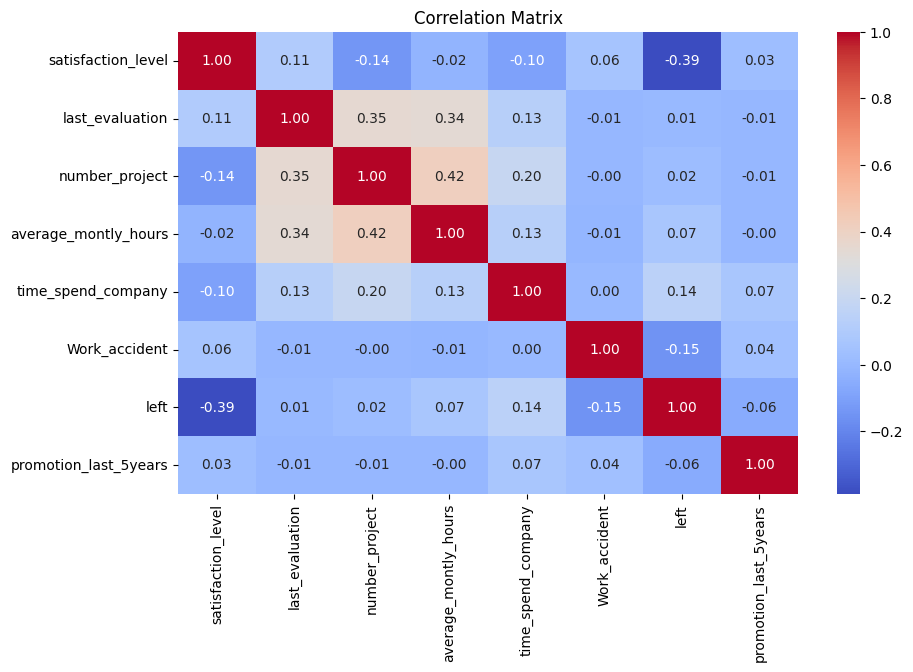

In [23]:
# corelation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


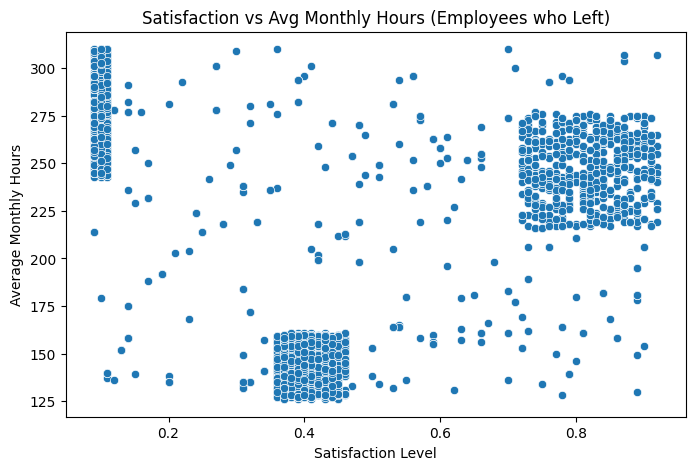

In [24]:
#  Satisfaction vs Average Monthly Hours (only for employees who left)
left_df = df[df['left'] == 1]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=left_df, x='satisfaction_level', y='average_montly_hours')
plt.title('Satisfaction vs Avg Monthly Hours (Employees who Left)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.show()


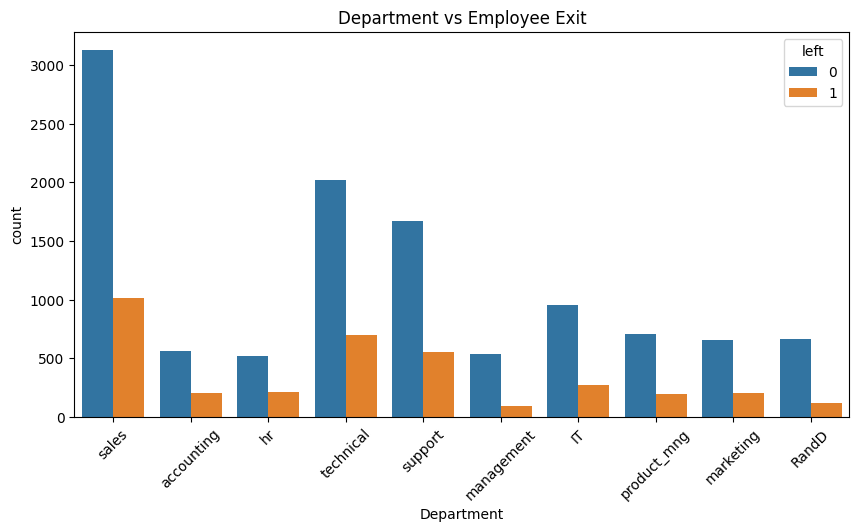

In [25]:
# Department-wise Attrition
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Department', hue='left')
plt.title('Department vs Employee Exit')
plt.xticks(rotation=45)
plt.show()


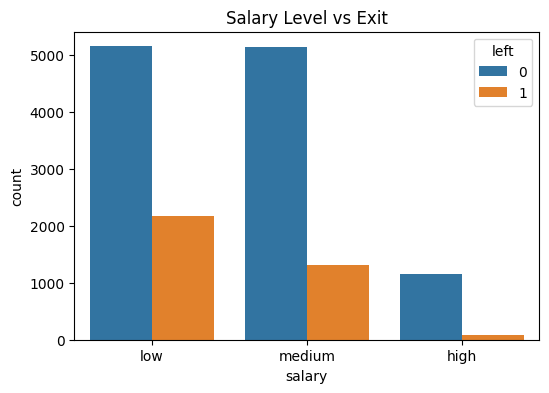

In [26]:
# Salary-wise Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Salary Level vs Exit')
plt.show()


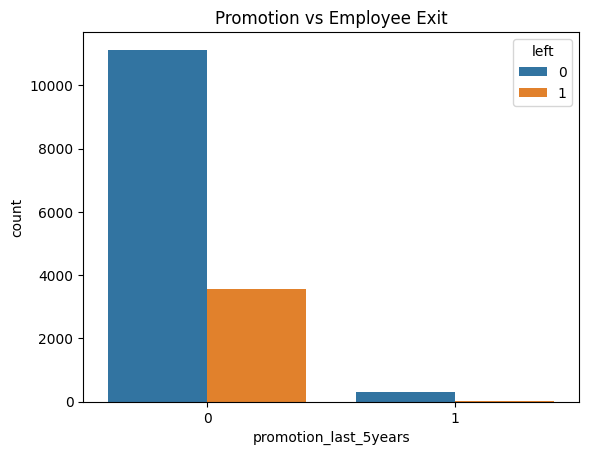

In [27]:
# Promotion in Last 5 Years vs Exit
sns.countplot(data=df, x='promotion_last_5years', hue='left')
plt.title('Promotion vs Employee Exit')
plt.show()


In [30]:
# Encode Categorical Features
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid changing the original
df_encoded = df.copy()

# Encode 'Department' and 'salary'
le = LabelEncoder()
df_encoded['Department'] = le.fit_transform(df_encoded['Department'])
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])


In [28]:
# Split the Data
from sklearn.model_selection import train_test_split

X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9883333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix:
 [[2285    9]
 [  26  680]]
